# Naive Bayes

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Cars.csv')
X = dataset.iloc[:, [3, 4]].values
y = dataset.iloc[:, -1].values

#X=X.astype('int')
#y=y.astype('int')

In [3]:
y

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1], dtype=int64)

In [4]:
X

array([[20000, 22000],
       [35000, 18000],
       [10000, 25000],
       [40000, 15000],
       [ 5000, 28000],
       [45000, 12000],
       [30000, 20000],
       [38000, 16000],
       [25000, 19000],
       [15000, 26000],
       [55000, 12000],
       [28000, 16000],
       [ 1000, 35000],
       [60000, 10000],
       [12000, 22000],
       [34000, 13000],
       [ 8000, 35000],
       [29000, 17000],
       [ 2000, 28000],
       [48000, 14000],
       [45000, 13000],
       [15000, 22000],
       [25000, 28000],
       [30000, 19000],
       [ 5000, 30000],
       [55000, 16000],
       [32000, 22000],
       [10000, 32000],
       [40000, 20000],
       [29000, 22000],
       [ 8000, 42000],
       [80000, 20000],
       [65000, 24000],
       [ 5000, 40000],
       [20000, 38000],
       [15000, 42000],
       [45000, 19000],
       [34000, 26000],
       [12000, 38000],
       [22000, 30000],
       [70000, 17000],
       [12000, 30000],
       [32000, 23000],
       [400

## Splitting the dataset into the Training set and Test set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [6]:
X_train

array([[32000, 23000],
       [35000, 18000],
       [ 2000, 32000],
       [58000, 30000],
       [25000, 19000],
       [13000, 32000],
       [22000, 24000],
       [40000, 15000],
       [39000, 19000],
       [ 8000, 42000],
       [10000, 32000],
       [ 2000, 28000],
       [18000, 23000],
       [ 3000, 31000],
       [ 3000, 42000],
       [28000, 32000],
       [15000, 25000],
       [12000, 30000],
       [ 5000, 28000],
       [34000, 13000],
       [29000, 17000],
       [70000, 17000],
       [12000, 38000],
       [45000, 12000],
       [55000, 16000],
       [56000, 13000],
       [20000, 22000],
       [20000, 38000],
       [40000, 20000],
       [50000, 17000],
       [28000, 16000],
       [15000, 42000],
       [30000, 19000],
       [ 8000, 28000],
       [55000, 12000],
       [80000, 20000],
       [12000, 24000],
       [ 5000, 32000],
       [40000, 18000],
       [35000, 18000],
       [65000, 24000],
       [28000, 30000],
       [12000, 22000],
       [420

In [7]:
y_test

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0], dtype=int64)

## Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
X_train

array([[ 0.22561621, -0.18061608],
       [ 0.38354756, -0.81277238],
       [-1.35369726,  0.95726525],
       [ 1.59435455,  0.70440273],
       [-0.14289027, -0.68634112],
       [-0.77461565,  0.95726525],
       [-0.30082161, -0.05418483],
       [ 0.64676647, -1.19206616],
       [ 0.59412269, -0.68634112],
       [-1.03783456,  2.22157784],
       [-0.932547  ,  0.95726525],
       [-1.35369726,  0.45154021],
       [-0.51139674, -0.18061608],
       [-1.30105348,  0.83083399],
       [-1.30105348,  2.22157784],
       [ 0.01504108,  0.95726525],
       [-0.66932809,  0.07224643],
       [-0.82725944,  0.70440273],
       [-1.19576591,  0.45154021],
       [ 0.33090377, -1.44492868],
       [ 0.06768486, -0.93920364],
       [ 2.22607994, -0.93920364],
       [-0.82725944,  1.7158528 ],
       [ 0.90998538, -1.57135994],
       [ 1.4364232 , -1.0656349 ],
       [ 1.48906698, -1.44492868],
       [-0.40610918, -0.30704734],
       [-0.40610918,  1.7158528 ],
       [ 0.64676647,

In [10]:
y_test

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0], dtype=int64)

## Training the Naive Bayes model on the Training set

In [11]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

## Predicting the Test set results

In [12]:
y_pred = classifier.predict(X_test)

In [13]:
y_pred

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0], dtype=int64)

In [14]:
y_test

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0], dtype=int64)

## Making the Confusion Matrix

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[13  2]
 [ 0  9]]


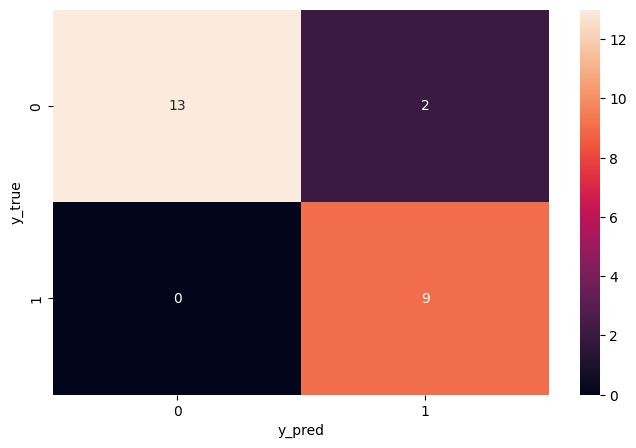

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [17]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.82      1.00      0.90         9

    accuracy                           0.92        24
   macro avg       0.91      0.93      0.91        24
weighted avg       0.93      0.92      0.92        24



## Visualising the Training set results

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1900\3477755713.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


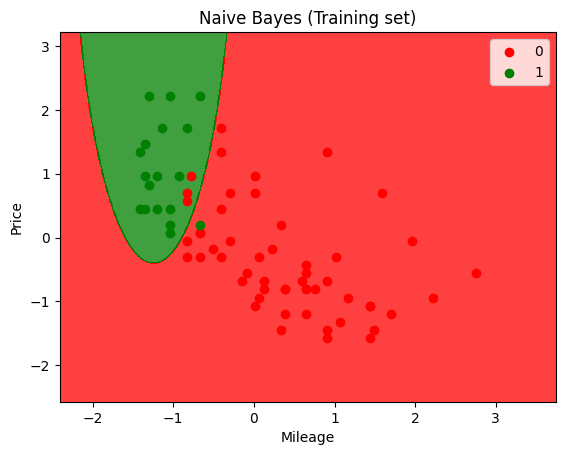

In [18]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.legend()
plt.show()

## Visualising the Test set results

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1900\1300220105.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


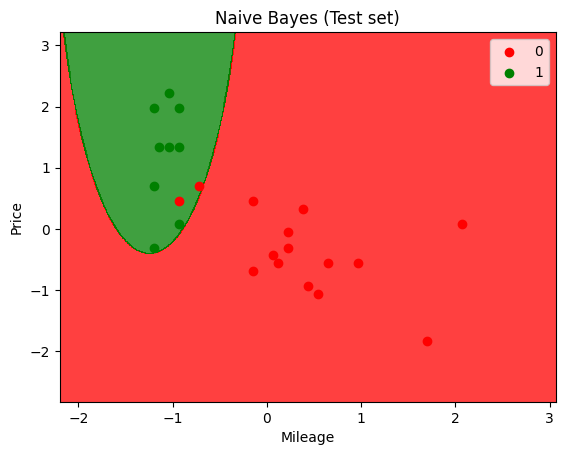

In [19]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.legend()
plt.show()